# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


In Part 5, we will be comparing several ML algorithms for build regression models of Butyrylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [2]:
df = pd.read_csv('Butyrylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [4]:
# Examine X dimension
X.shape

(3851, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(3851, 146)

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

## **4. Compare ML algorithms**

In [7]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:33<00:00,  1.27it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 3273, number of used features: 146
[LightGBM] [Info] Start training from score -3.261868
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:30<00:00,  1.36it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 3273, number of used features: 146
[LightGBM] [Info] Start training from score -3.261868


In [8]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.82,0.82,0.65,0.10
ExtraTreeRegressor,0.82,0.82,0.65,0.09
ExtraTreesRegressor,0.82,0.82,0.65,6.40
GaussianProcessRegressor,0.82,0.82,0.65,1.93
XGBRegressor,0.76,0.77,0.73,0.17
RandomForestRegressor,0.76,0.77,0.74,5.85
BaggingRegressor,0.73,0.74,0.79,0.62
MLPRegressor,0.69,0.70,0.84,2.39
HistGradientBoostingRegressor,0.54,0.56,1.02,2.57


In [9]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.09,0.32,1.22,2.40
LGBMRegressor,0.08,0.32,1.22,0.13
NuSVR,0.02,0.27,1.26,0.50
SVR,0.01,0.26,1.26,0.63
GradientBoostingRegressor,0.01,0.26,1.27,0.93
RandomForestRegressor,-0.02,0.24,1.29,5.79
KNeighborsRegressor,-0.05,0.21,1.31,0.05
XGBRegressor,-0.07,0.20,1.32,0.11
BaggingRegressor,-0.07,0.20,1.32,0.59


## **5. Data visualization of model performance**

[(0.0, 1.0)]

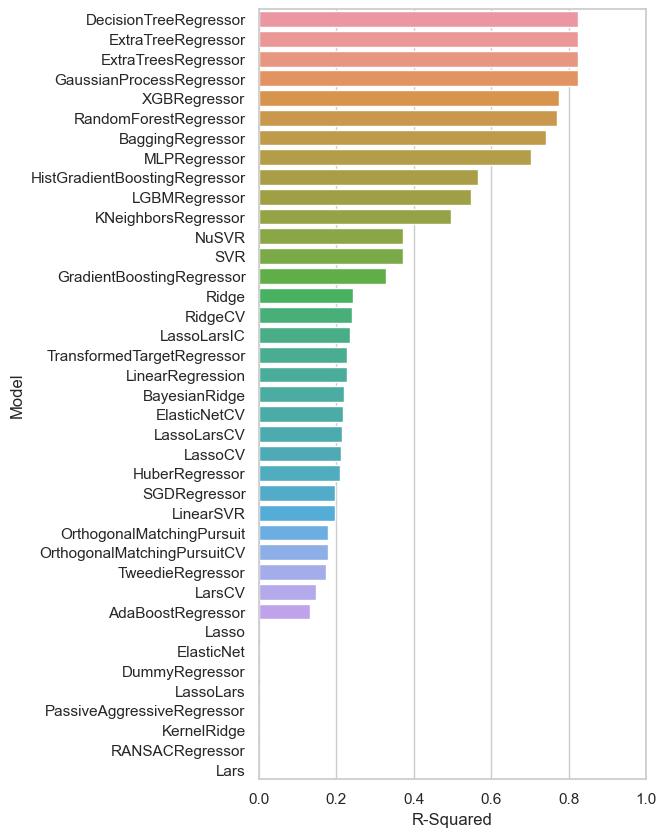

In [10]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

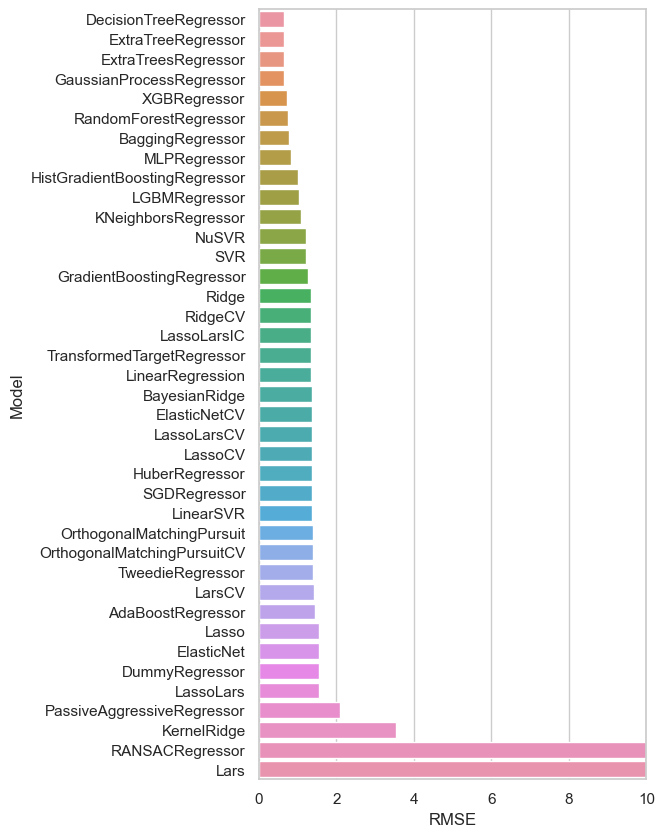

In [11]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

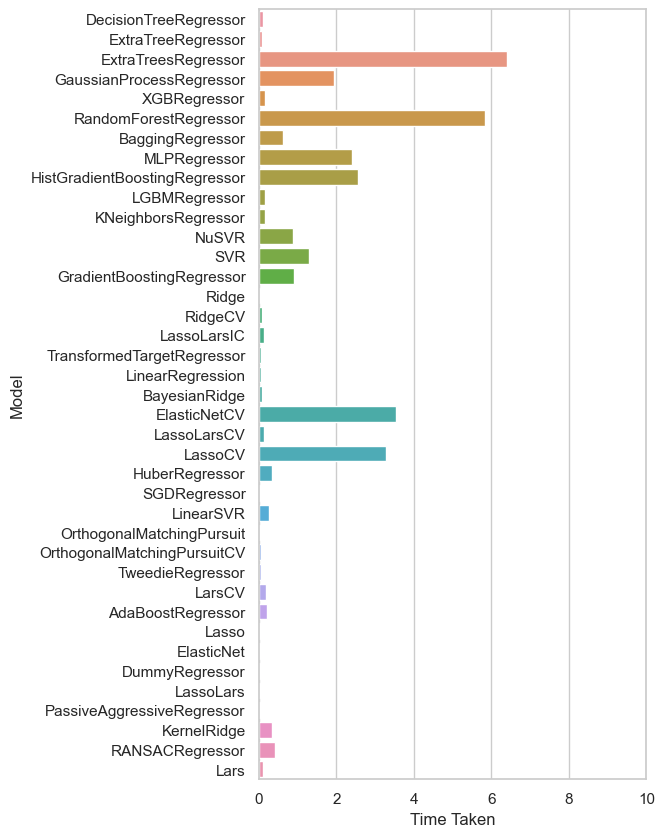

In [12]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))